In [1]:
import torch
from torchvision import models,transforms

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = models.resnet34(pretrained=True).to("cuda")
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

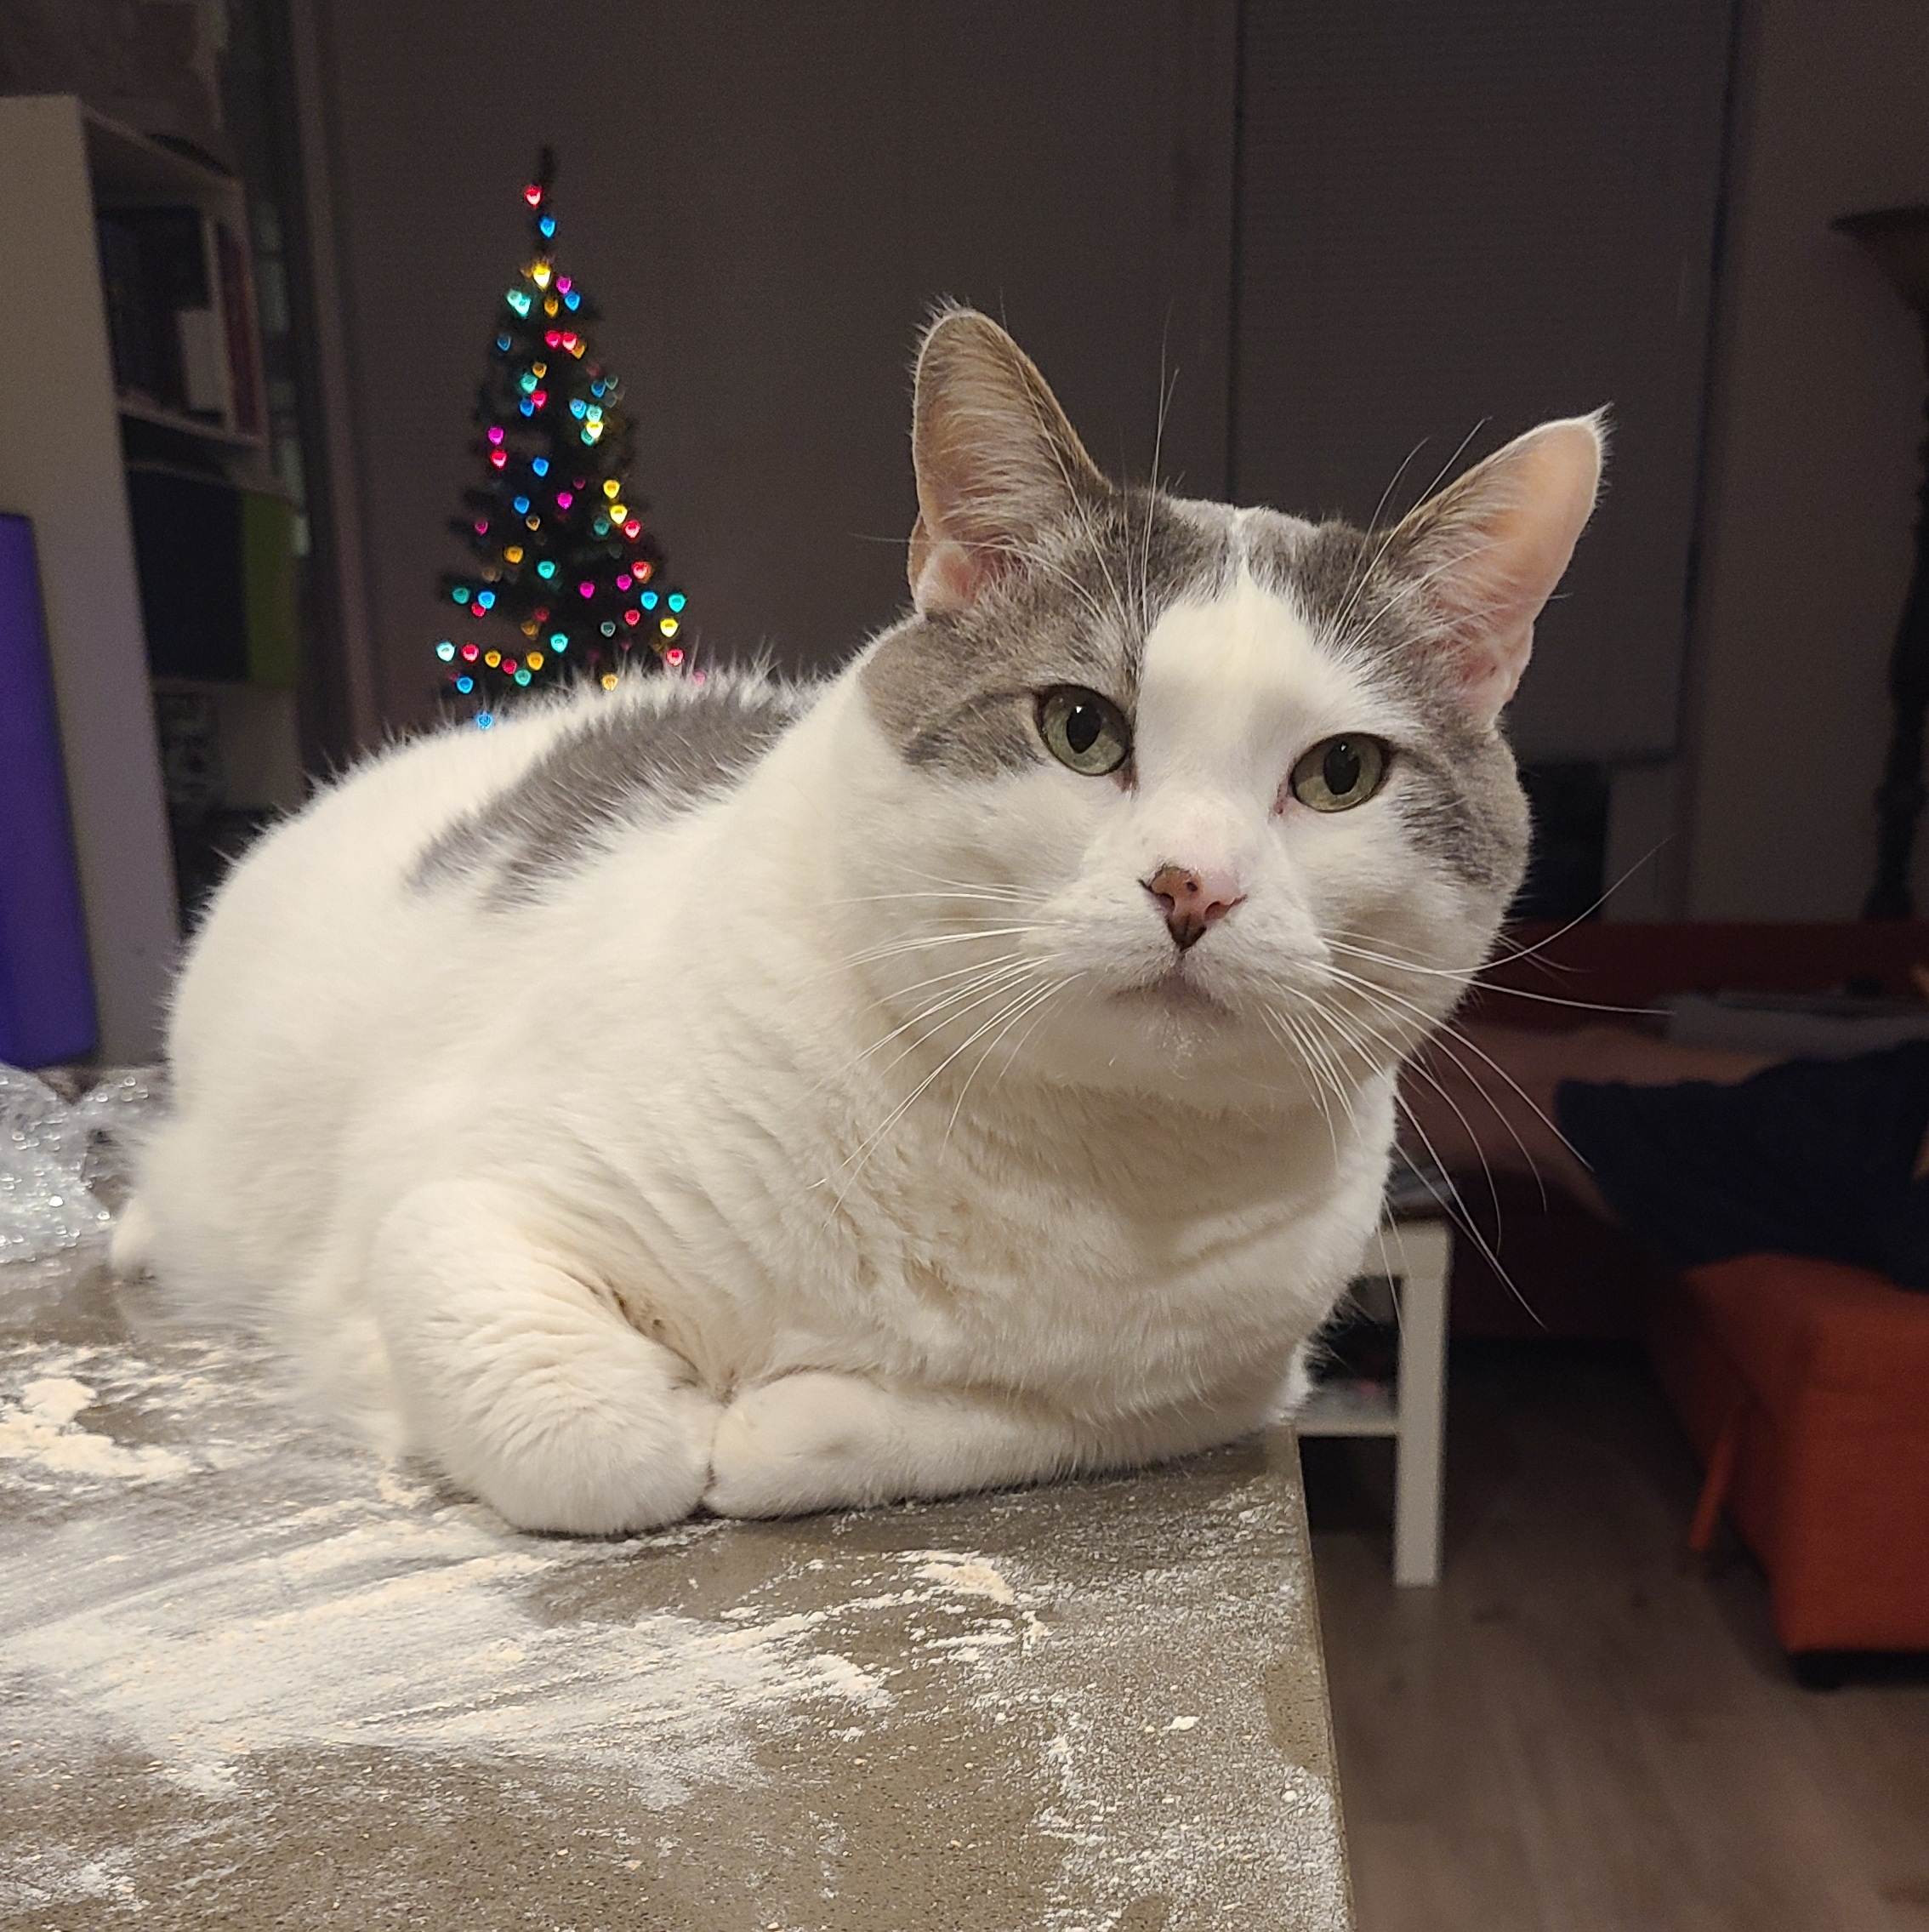

In [3]:
from PIL import Image

img = Image.open("./inference/img1.jpg")
img

In [4]:
transform =transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

img = transform(img)
img.shape

torch.Size([3, 224, 224])

In [5]:
img_batch = torch.unsqueeze(img, 0).to("cuda")
img_batch

tensor([[[[-1.1418, -1.2274, -1.2617,  ..., -1.1932, -1.1932, -1.1760],
          [-1.1247, -1.1247, -1.2274,  ..., -1.1932, -1.1932, -1.1760],
          [-1.3815, -1.2617, -1.2274,  ..., -1.2103, -1.2103, -1.1932],
          ...,
          [ 0.5022,  0.5536,  0.4679,  ..., -0.4911, -0.4397, -0.4397],
          [ 0.3994,  0.4508,  0.5022,  ..., -0.4568, -0.4226, -0.4054],
          [ 0.3309,  0.2453,  0.2796,  ..., -0.4568, -0.4226, -0.3712]],

         [[-1.2129, -1.2829, -1.3179,  ..., -1.2654, -1.2654, -1.2654],
          [-1.2129, -1.1954, -1.3004,  ..., -1.2654, -1.2654, -1.2479],
          [-1.4055, -1.3004, -1.2654,  ..., -1.2829, -1.2654, -1.2654],
          ...,
          [ 0.3803,  0.4328,  0.3277,  ..., -0.7577, -0.7402, -0.7402],
          [ 0.2577,  0.3277,  0.3627,  ..., -0.7402, -0.7052, -0.7052],
          [ 0.1527,  0.1001,  0.1352,  ..., -0.7577, -0.7052, -0.6702]],

         [[-1.0201, -1.0724, -1.1247,  ..., -1.0724, -1.0724, -1.0550],
          [-1.0027, -0.9853, -

In [6]:
img_batch.shape

torch.Size([1, 3, 224, 224])

In [7]:
model.eval()
with torch.no_grad():
    outputs = model(img_batch)
probs = torch.nn.functional.softmax(outputs[0], dim=0)
probs

tensor([9.3905e-07, 2.5114e-06, 1.9118e-05, 2.7448e-05, 4.0039e-05, 2.4969e-05,
        3.6159e-05, 1.2983e-05, 1.4441e-05, 2.3491e-06, 2.1234e-07, 1.3409e-07,
        6.1509e-06, 4.0055e-06, 1.4305e-06, 4.4545e-06, 7.7713e-07, 3.2711e-06,
        5.8843e-06, 1.0140e-06, 3.8434e-06, 3.1749e-07, 2.0429e-06, 3.1754e-06,
        1.3346e-06, 2.7269e-07, 9.7121e-08, 4.7023e-07, 1.0801e-06, 7.5461e-07,
        5.3732e-07, 6.5340e-07, 3.5023e-07, 1.6453e-06, 8.2076e-06, 8.5493e-07,
        3.8139e-06, 2.4941e-06, 1.0207e-06, 3.9570e-06, 1.6233e-06, 2.2876e-06,
        1.6931e-07, 1.4902e-06, 1.2106e-06, 9.7265e-07, 5.2762e-06, 2.8874e-07,
        7.3667e-07, 2.0165e-07, 3.1835e-06, 3.0164e-05, 1.2046e-05, 8.5404e-06,
        3.9599e-06, 2.2643e-06, 9.5857e-06, 6.1450e-07, 2.0908e-06, 6.8610e-06,
        6.4246e-05, 4.4971e-06, 2.1064e-06, 7.1611e-07, 8.4742e-07, 2.1489e-06,
        4.5183e-06, 8.9746e-06, 8.6044e-07, 2.0428e-06, 4.7021e-06, 1.2227e-05,
        2.3518e-06, 2.0710e-06, 4.1790e-

In [8]:
import pandas as pd 

categories = pd.read_csv("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", header=None)
categories[0][2]

'great white shark'

In [9]:
topk = 5

prob, class_number = torch.topk(probs, topk)

for i in range(topk):
    probability = prob[i].item()
    class_name = categories[0][int(class_number[i])]
    print("%{} {}".format(int(100*probability), class_name))

%13 lynx
%12 Egyptian cat
%7 bucket
%6 tub
%5 plastic bag


In [10]:
import numpy as np

In [11]:
import torch.backends.cudnn as cudnn
cudnn.benchmark = True

def benchmark(model, device="cuda", input_shape=(1, 3, 224, 224,), dtype='fp32', nwarmup =50, nruns=100):
    import time
    input_data = torch.randn(input_shape)
    input_data = input_data.to(device)
    if dtype=='fp16':
        input_data = input_data.half()
    print("Warm up ....")
    with torch.no_grad():
        for i in range(nwarmup):
            features = model(input_data)
            
    torch.cuda.synchronize()
    print("Start timing...")
    timings = []
    with torch.no_grad():
        for i in range(1, nruns+1):
            start_time = time.time()
            features = model(input_data)
            torch.cuda.synchronize()
            end_time = time.time()
            timings.append(end_time - start_time)
            if i%10==0:
                print('Iteration %d/%d,ave batchtime %.2f ms'%(i, nruns, np.mean(timings))*1000)
    
    print("Input Shape:", input_data.size())
    print("Output Features size:", features.size())
    print("Average batch time:, %.2f ms"%(np.mean(timings)*1000))

In [12]:
model = model.to("cuda")
benchmark(model)

Warm up ....
Start timing...
Iteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave batchtime 0.01 msIteration 10/100,ave 

In [13]:
traced_model = torch.jit.trace(model, [torch.randn(1, 3, 224, 224).to("cuda")])
traced_model

ResNet(
  original_name=ResNet
  (conv1): Conv2d(original_name=Conv2d)
  (bn1): BatchNorm2d(original_name=BatchNorm2d)
  (relu): ReLU(original_name=ReLU)
  (maxpool): MaxPool2d(original_name=MaxPool2d)
  (layer1): Sequential(
    original_name=Sequential
    (0): BasicBlock(
      original_name=BasicBlock
      (conv1): Conv2d(original_name=Conv2d)
      (bn1): BatchNorm2d(original_name=BatchNorm2d)
      (relu): ReLU(original_name=ReLU)
      (conv2): Conv2d(original_name=Conv2d)
      (bn2): BatchNorm2d(original_name=BatchNorm2d)
    )
    (1): BasicBlock(
      original_name=BasicBlock
      (conv1): Conv2d(original_name=Conv2d)
      (bn1): BatchNorm2d(original_name=BatchNorm2d)
      (relu): ReLU(original_name=ReLU)
      (conv2): Conv2d(original_name=Conv2d)
      (bn2): BatchNorm2d(original_name=BatchNorm2d)
    )
    (2): BasicBlock(
      original_name=BasicBlock
      (conv1): Conv2d(original_name=Conv2d)
      (bn1): BatchNorm2d(original_name=BatchNorm2d)
      (relu): ReLU(

In [14]:
import torch_tensorrt

In [15]:
trt_model = torch_tensorrt.compile(traced_model,
                                  inputs = [torch_tensorrt.Input((1,3,224,224), dtype=torch.float32)], 
                                  enabled_precisions= {torch.float32})

In [16]:
benchmark(trt_model)

Warm up ....
Start timing...
Iteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave batchtime 0.00 msIteration 10/100,ave 

In [17]:
trt_model.eval()
with torch.no_grad():
    outputs = trt_model(img_batch)
probs = torch.nn.functional.softmax(outputs[0], dim=0)
probs

topk = 5

prob, class_number = torch.topk(probs, topk)

for i in range(topk):
    probability = prob[i].item()
    class_name = categories[0][int(class_number[i])]
    print("%{} {}".format(int(100*probability), class_name))

%13 lynx
%12 Egyptian cat
%7 bucket
%6 tub
%5 plastic bag
